In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
g_ryong_df0= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing /계룡0년_aws.csv")
g_ryong_df1= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡1년_aws.csv")
g_ryong_df2= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡2년_aws.csv")
g_ryong_df3= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡3년_aws.csv")

FileNotFoundError: [Errno 2] No such file or directory: '지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡0년_aws.csv'

In [33]:
#g_ryong_df0=g_ryong_df0.drop(["Unnamed: 0","지점","연도"],axis=1)

In [34]:
g_ryong_df0

,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,01-01 00:00,0.154818,0.410833,0.033248,0.0,0.830
1,01-01 01:00,0.142180,0.148611,0.030691,0.0,0.853
2,01-01 02:00,0.173776,0.203889,0.040921,0.0,0.802
3,01-01 03:00,0.169036,0.330556,0.048593,0.0,0.816
4,01-01 04:00,0.169036,0.000000,0.007673,0.0,0.827
...,...,...,...,...,...,...
8755,12-31 19:00,0.399684,0.426389,0.012788,0.0,0.558
8756,12-31 20:00,0.393365,0.000000,0.000000,0.0,0.588
8757,12-31 21:00,0.390205,0.000000,0.000000,0.0,0.615
8758,12-31 22:00,0.387046,0.000000,0.000000,0.0,0.618


In [23]:
# plt.rcParams['font.family']="AppleGothic"
# plt.figure(figsize=(20,10))  #그래프 크기조절하고
# plt.plot(g_ryong_df0["일시"],g_ryong_df0["풍향(deg)"])
# plt.xlabel("일시")
# plt.ylabel("풍향")
# plt.title("일시에 따른 풍향")

# plt.show()

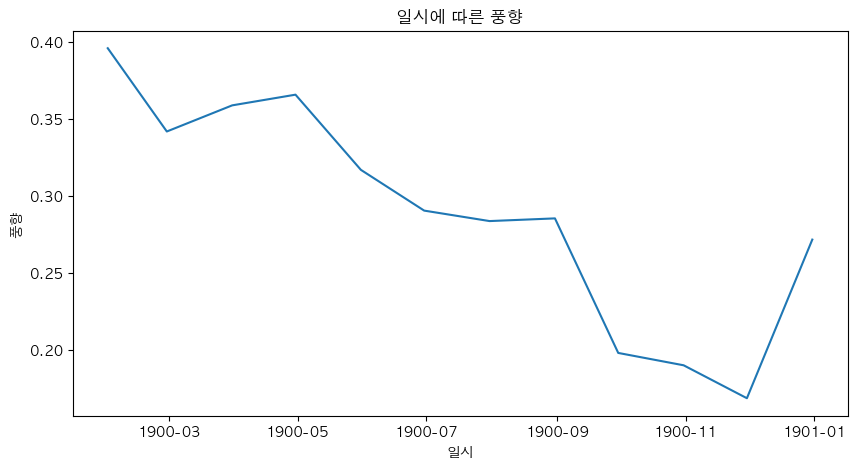

In [40]:
plt.rcParams['font.family']="AppleGothic"
g_ryong_df0["일시"]= pd.to_datetime(g_ryong_df0["일시"],format="%m-%d %H:%M")

#월별 데이터를 그룹
g_ryong_df0_a= g_ryong_df0.set_index('일시')
monthly_mean= g_ryong_df0_a["풍향(deg)"].resample("M").mean()

#그림그리기
plt.figure(figsize=(10,5))  #그래프 크기조절하고
plt.plot(monthly_mean.index,monthly_mean)
plt.xlabel("일시")
plt.ylabel("풍향")
plt.title("일시에 따른 풍향")

plt.show()

## 0 1 2 년차의 풍향을 보면 매년 달라진다

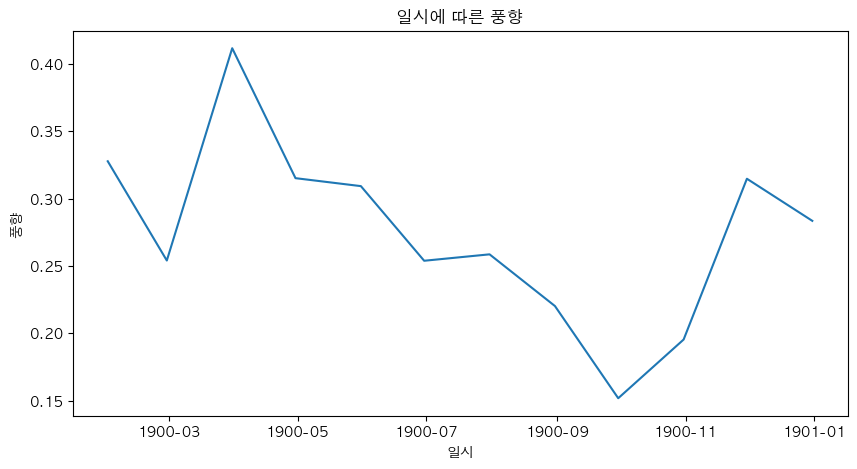

In [48]:
plt.rcParams['font.family']="AppleGothic"
g_ryong_df1["일시"]= pd.to_datetime(g_ryong_df1["일시"],format="%m-%d %H:%M")

#월별 데이터를 그룹
g_ryong_df1_a= g_ryong_df1.set_index('일시')
monthly_mean= g_ryong_df1_a["풍향(deg)"].resample("M").mean()

#그림그리기
plt.figure(figsize=(10,5))  #그래프 크기조절하고
plt.plot(monthly_mean.index,monthly_mean)
plt.xlabel("일시")
plt.ylabel("풍향")
plt.title("일시에 따른 풍향")

plt.show()


### reset 세팅

In [58]:
g_ryong_df0= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡0년_aws.csv")
g_ryong_df1= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡1년_aws.csv")
g_ryong_df2= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡2년_aws.csv")
g_ryong_df3= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡3년_aws.csv")

# 월별 풍향비교

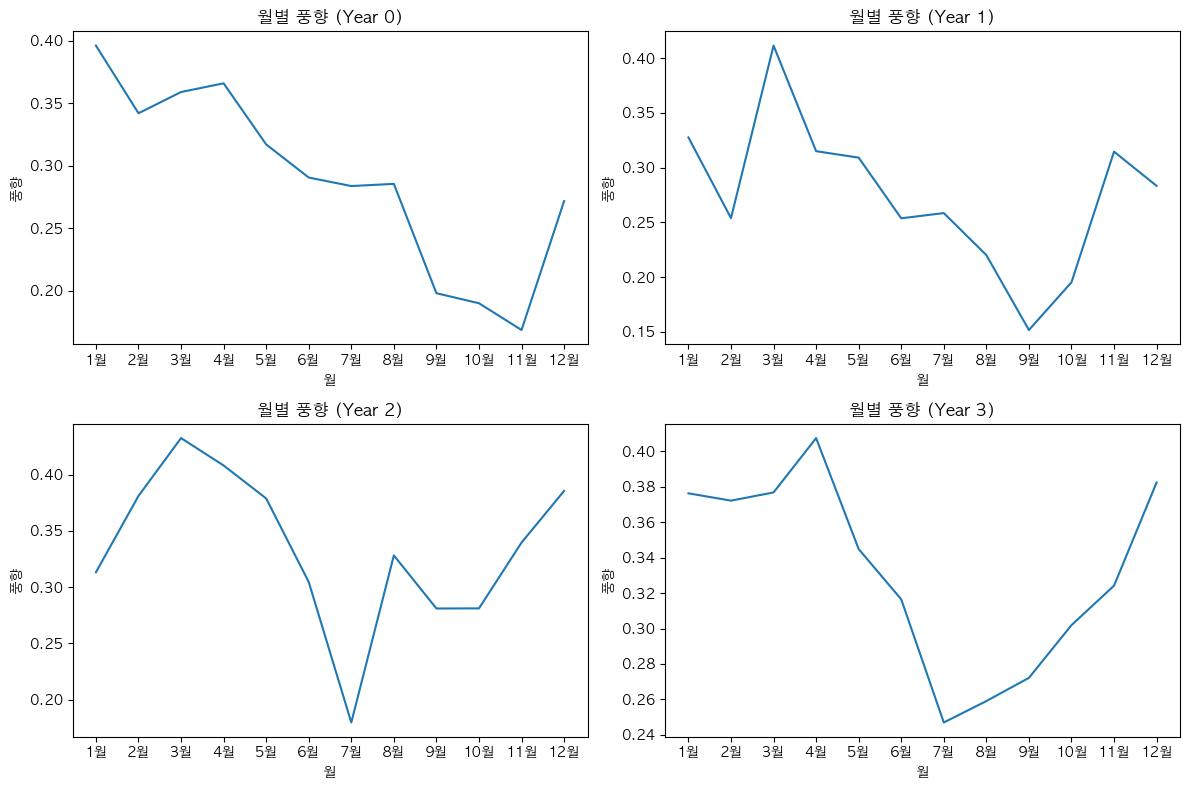

In [51]:
import numpy as np

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i, df in enumerate([g_ryong_df0, g_ryong_df1, g_ryong_df2, g_ryong_df3]):
    df_copy = df.copy()  # 원본 데이터 복사
    df_copy["일시"] = pd.to_datetime(df_copy["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')
    df_copy["월"] = df_copy["일시"].dt.month
    monthly_mean = df_copy.groupby("월")["풍향(deg)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"월별 풍향 (Year {i})")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()


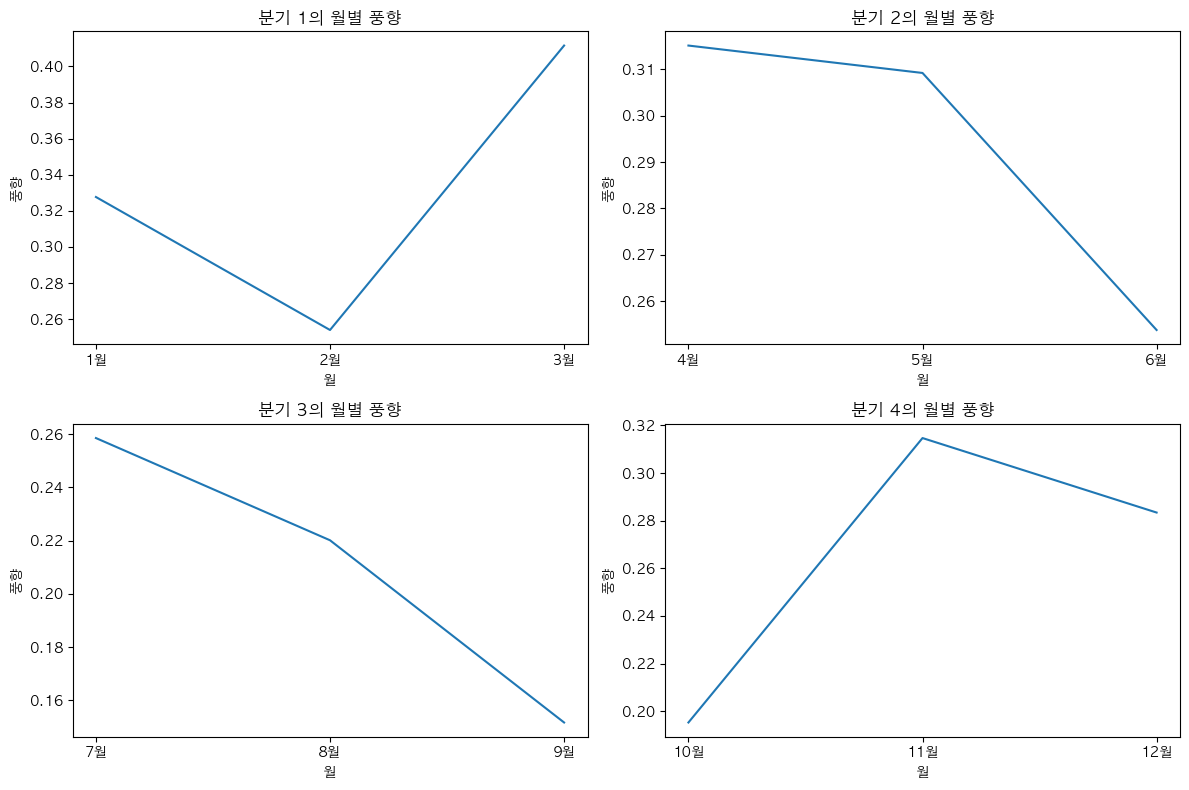

In [69]:
import numpy as np

# 계룡 1 데이터만 사용
g_ryong_df = g_ryong_df1.copy()

# 일시를 datetime 형식으로 변환
g_ryong_df["일시"] = pd.to_datetime(g_ryong_df["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')

# 월과 분기 정보 추가
g_ryong_df["월"] = g_ryong_df["일시"].dt.month
g_ryong_df["분기"] = g_ryong_df["월"].apply(lambda x: (x - 1) // 3 + 1)

# 분기별 풍향 평균 계산
quarterly_mean = g_ryong_df.groupby("분기")["풍향(deg)"].mean()

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i in range(4):
    quarter_data = g_ryong_df[g_ryong_df["분기"] == i + 1]
    monthly_mean = quarter_data.groupby("월")["풍향(deg)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(i * 3 + 1, i * 3 + 4))
    axes[i].set_xticklabels([f"{i * 3 + 1}월", f"{i * 3 + 2}월", f"{i * 3 + 3}월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"분기 {i + 1}의 월별 풍향")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()


### 0년~3년차 계룡 분기별 풍향변화

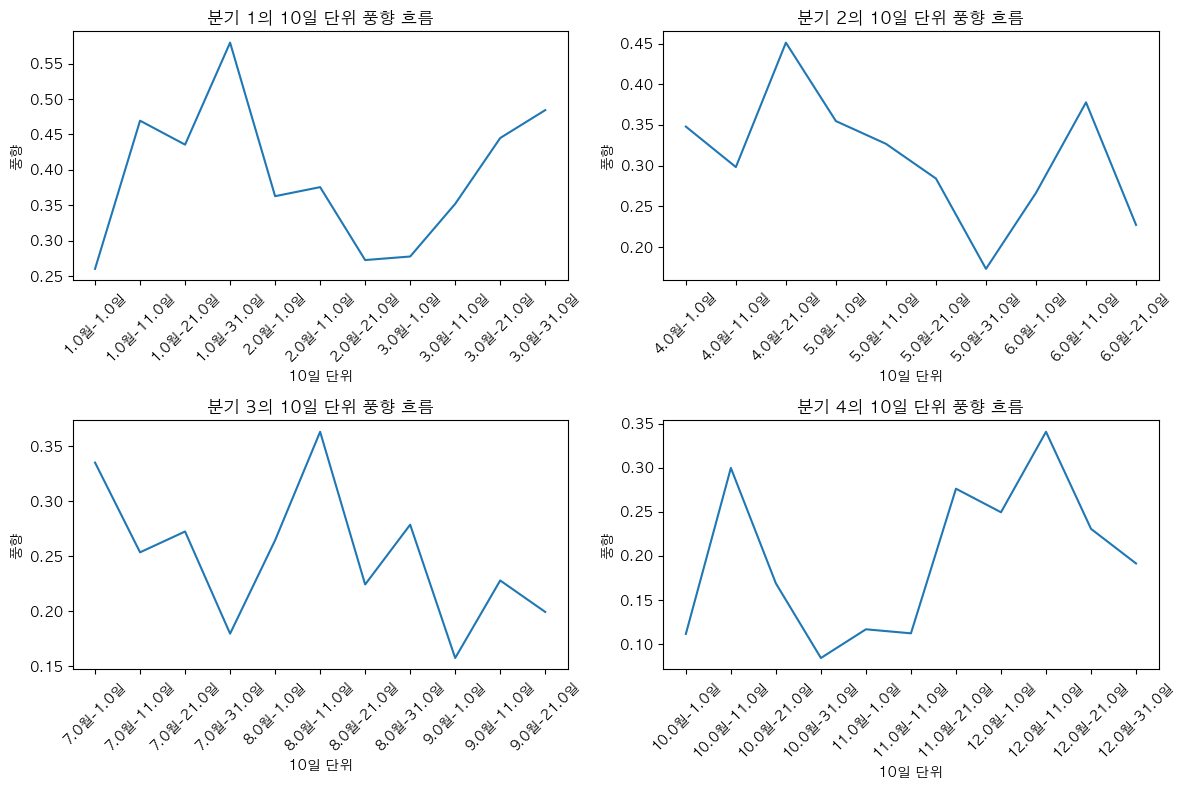

In [66]:
import numpy as np

# 계룡 1 데이터만 사용
g_ryong_df = g_ryong_df0.copy()

# 일시를 datetime 형식으로 변환
g_ryong_df["일시"] = pd.to_datetime(g_ryong_df["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')

# 월과 10일 단위 정보 추가
g_ryong_df["월"] = g_ryong_df["일시"].dt.month
g_ryong_df["일"] = g_ryong_df["일시"].dt.day
g_ryong_df["10일단위"] = g_ryong_df["일"].apply(lambda x: (x - 1) // 10 + 1)

# 월을 기준으로 분기 정보 생성
g_ryong_df["분기"] = g_ryong_df["월"].apply(lambda x: (x - 1) // 3 + 1)

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i in range(4):
    quarter_data = g_ryong_df[g_ryong_df["분기"] == i + 1]
    ten_days_mean = quarter_data.groupby(["월", "10일단위"])["풍향(deg)"].mean().reset_index()
    axes[i].plot(ten_days_mean.index, ten_days_mean["풍향(deg)"])
    axes[i].set_xticks(np.arange(len(ten_days_mean)))
    axes[i].set_xticklabels([f"{row['월']}월-{(row['10일단위'] - 1) * 10 + 1}일" for _, row in ten_days_mean.iterrows()], rotation=45)
    axes[i].set_xlabel("10일 단위")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"분기 {i + 1}의 10일 단위 풍향 흐름")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()


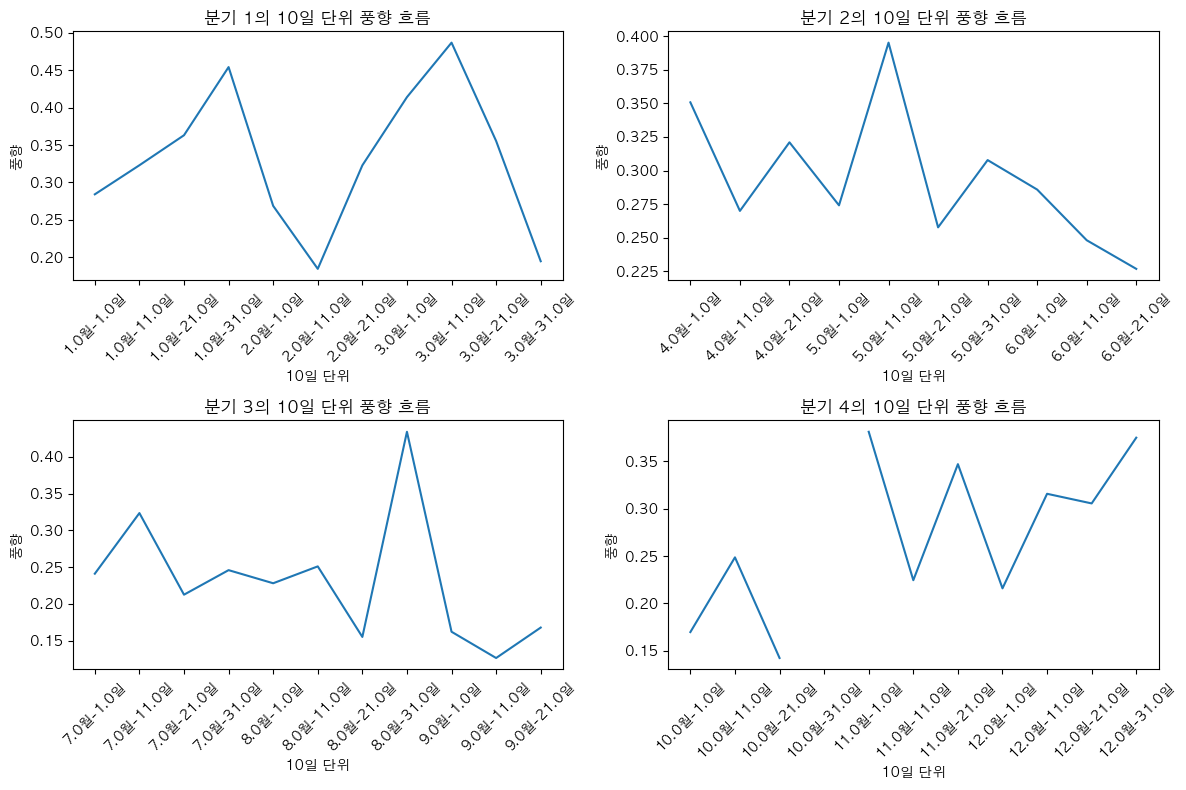

In [70]:
import numpy as np

# 계룡 1 데이터만 사용
g_ryong_df = g_ryong_df1.copy()

# 일시를 datetime 형식으로 변환
g_ryong_df["일시"] = pd.to_datetime(g_ryong_df["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')

# 월과 10일 단위 정보 추가
g_ryong_df["월"] = g_ryong_df["일시"].dt.month
g_ryong_df["일"] = g_ryong_df["일시"].dt.day
g_ryong_df["10일단위"] = g_ryong_df["일"].apply(lambda x: (x - 1) // 10 + 1)

# 월을 기준으로 분기 정보 생성
g_ryong_df["분기"] = g_ryong_df["월"].apply(lambda x: (x - 1) // 3 + 1)

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i in range(4):
    quarter_data = g_ryong_df[g_ryong_df["분기"] == i + 1]
    ten_days_mean = quarter_data.groupby(["월", "10일단위"])["풍향(deg)"].mean().reset_index()
    axes[i].plot(ten_days_mean.index, ten_days_mean["풍향(deg)"])
    axes[i].set_xticks(np.arange(len(ten_days_mean)))
    axes[i].set_xticklabels([f"{row['월']}월-{(row['10일단위'] - 1) * 10 + 1}일" for _, row in ten_days_mean.iterrows()], rotation=45)
    axes[i].set_xlabel("10일 단위")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"분기 {i + 1}의 10일 단위 풍향 흐름")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()

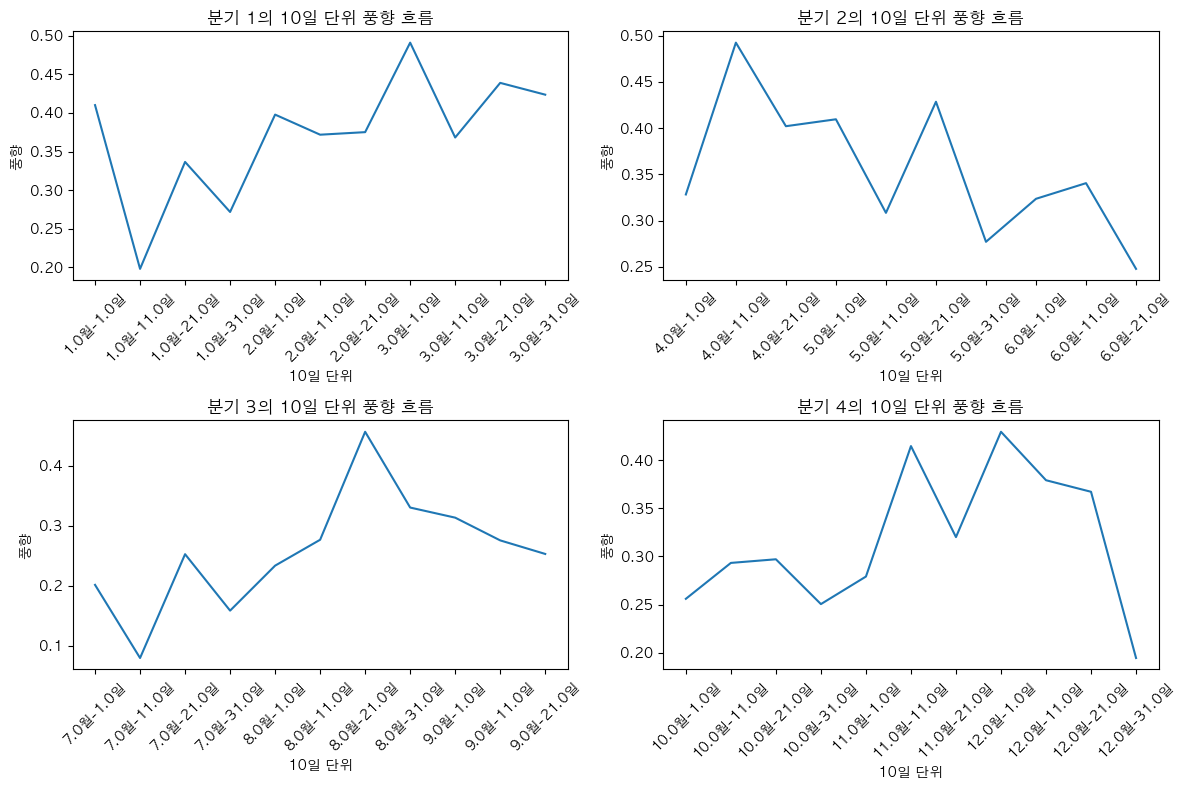

In [72]:
import numpy as np

# 계룡 1 데이터만 사용
g_ryong_df = g_ryong_df2.copy()

# 일시를 datetime 형식으로 변환
g_ryong_df["일시"] = pd.to_datetime(g_ryong_df["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')

# 월과 10일 단위 정보 추가
g_ryong_df["월"] = g_ryong_df["일시"].dt.month
g_ryong_df["일"] = g_ryong_df["일시"].dt.day
g_ryong_df["10일단위"] = g_ryong_df["일"].apply(lambda x: (x - 1) // 10 + 1)

# 월을 기준으로 분기 정보 생성
g_ryong_df["분기"] = g_ryong_df["월"].apply(lambda x: (x - 1) // 3 + 1)

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i in range(4):
    quarter_data = g_ryong_df[g_ryong_df["분기"] == i + 1]
    ten_days_mean = quarter_data.groupby(["월", "10일단위"])["풍향(deg)"].mean().reset_index()
    axes[i].plot(ten_days_mean.index, ten_days_mean["풍향(deg)"])
    axes[i].set_xticks(np.arange(len(ten_days_mean)))
    axes[i].set_xticklabels([f"{row['월']}월-{(row['10일단위'] - 1) * 10 + 1}일" for _, row in ten_days_mean.iterrows()], rotation=45)
    axes[i].set_xlabel("10일 단위")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"분기 {i + 1}의 10일 단위 풍향 흐름")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()

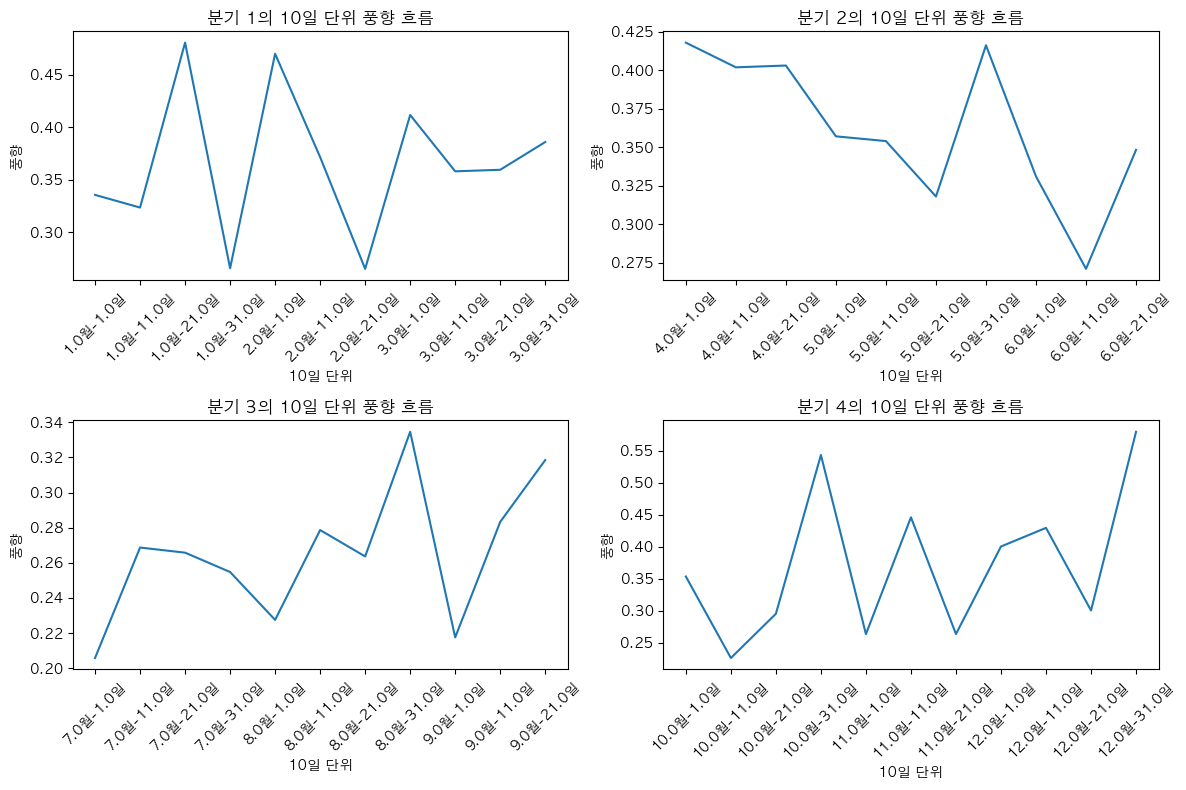

In [71]:
import numpy as np

# 계룡 1 데이터만 사용
g_ryong_df = g_ryong_df3.copy()

# 일시를 datetime 형식으로 변환
g_ryong_df["일시"] = pd.to_datetime(g_ryong_df["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')

# 월과 10일 단위 정보 추가
g_ryong_df["월"] = g_ryong_df["일시"].dt.month
g_ryong_df["일"] = g_ryong_df["일시"].dt.day
g_ryong_df["10일단위"] = g_ryong_df["일"].apply(lambda x: (x - 1) // 10 + 1)

# 월을 기준으로 분기 정보 생성
g_ryong_df["분기"] = g_ryong_df["월"].apply(lambda x: (x - 1) // 3 + 1)

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i in range(4):
    quarter_data = g_ryong_df[g_ryong_df["분기"] == i + 1]
    ten_days_mean = quarter_data.groupby(["월", "10일단위"])["풍향(deg)"].mean().reset_index()
    axes[i].plot(ten_days_mean.index, ten_days_mean["풍향(deg)"])
    axes[i].set_xticks(np.arange(len(ten_days_mean)))
    axes[i].set_xticklabels([f"{row['월']}월-{(row['10일단위'] - 1) * 10 + 1}일" for _, row in ten_days_mean.iterrows()], rotation=45)
    axes[i].set_xlabel("10일 단위")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"분기 {i + 1}의 10일 단위 풍향 흐름")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()

## 연도별 풍속 비교 

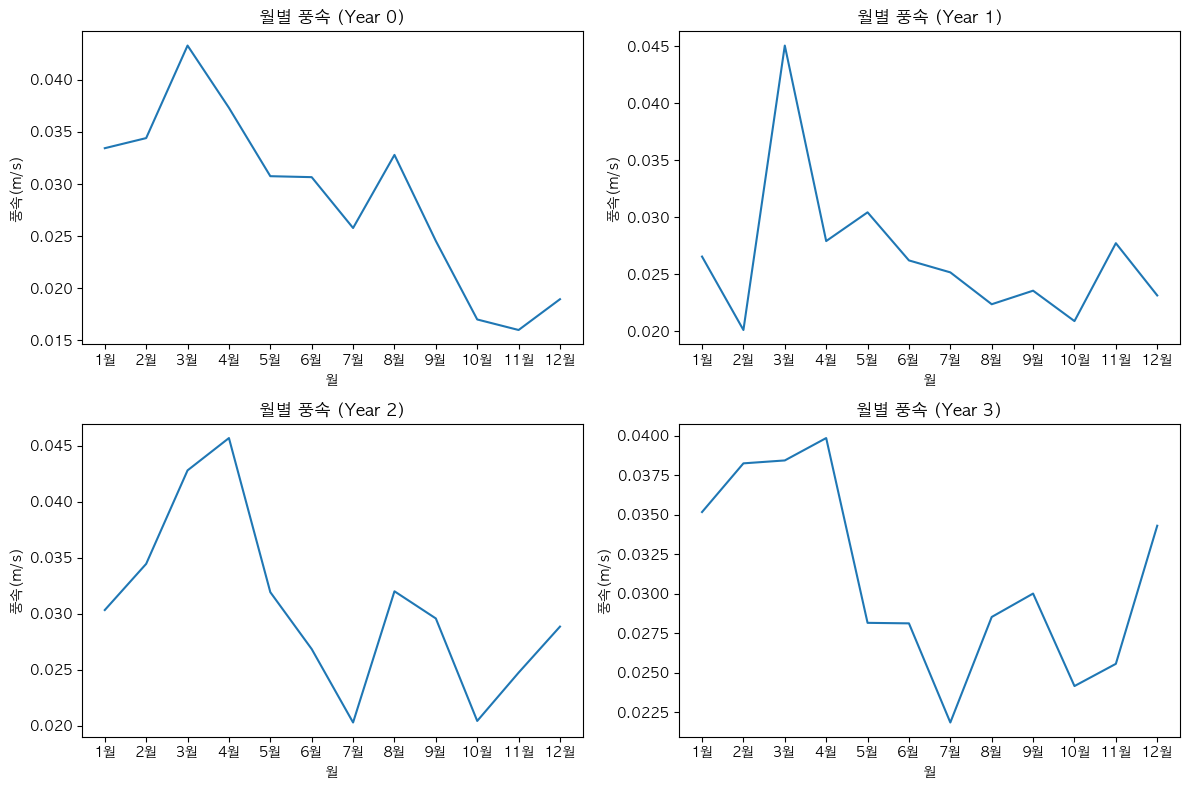

In [54]:
import numpy as np

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i, df in enumerate([g_ryong_df0, g_ryong_df1, g_ryong_df2, g_ryong_df3]):
    df_copy = df.copy()  # 원본 데이터 복사
    df_copy["일시"] = pd.to_datetime(df_copy["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')
    df_copy["월"] = df_copy["일시"].dt.month
    monthly_mean = df_copy.groupby("월")["풍속(m/s)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("풍속(m/s)")
    axes[i].set_title(f"월별 풍속 (Year {i})")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()


## 월별 습도비교

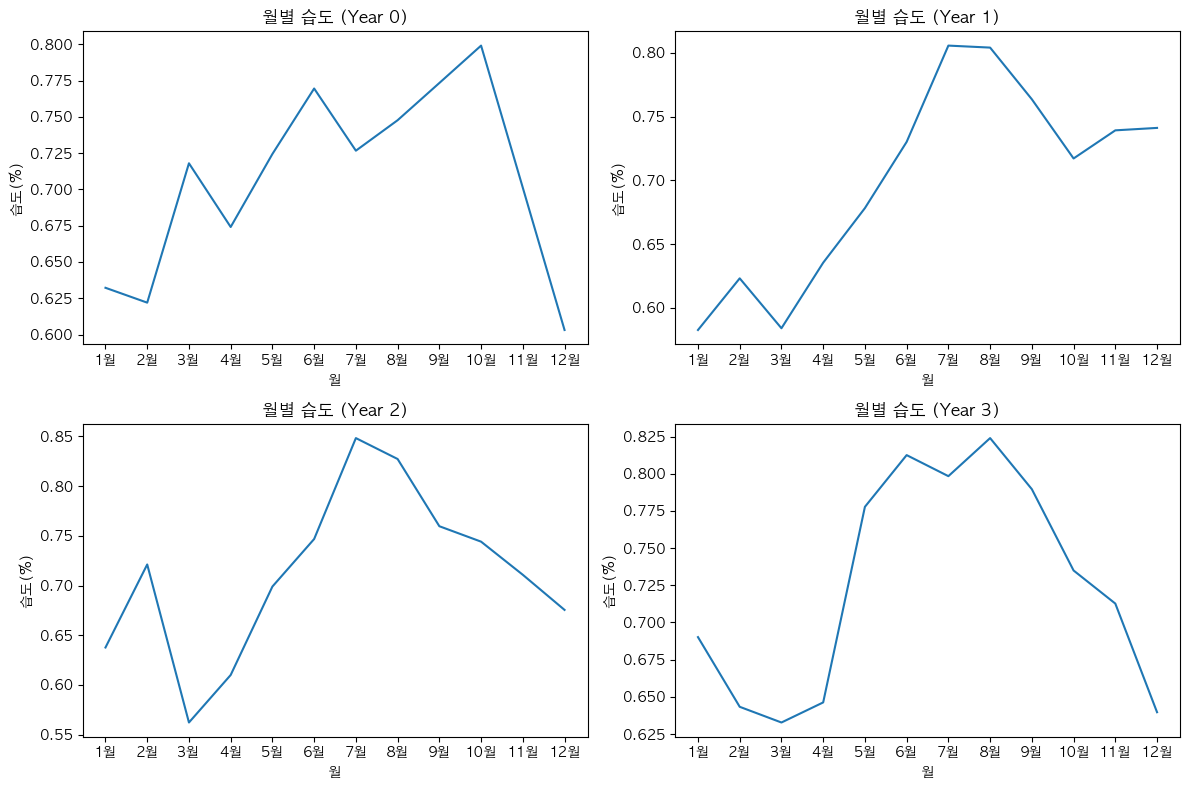

In [60]:
import numpy as np

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i, df in enumerate([g_ryong_df0, g_ryong_df1, g_ryong_df2, g_ryong_df3]):
    df_copy = df.copy()  # 원본 데이터 복사
    df_copy["일시"] = pd.to_datetime(df_copy["일시"].astype(str).apply(lambda x: "2000-" + x), format="%Y-%m-%d %H:%M", errors='coerce')
    df_copy["월"] = df_copy["일시"].dt.month
    monthly_mean = df_copy.groupby("월")["습도(%)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("습도(%)")
    axes[i].set_title(f"월별 습도 (Year {i})")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()

In [56]:
g_ryong_df0

,Unnamed: 0,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,0,01-01 00:00,계룡,0.154818,0.410833,0.033248,0.0,0.830
1,1,0,01-01 01:00,계룡,0.142180,0.148611,0.030691,0.0,0.853
2,2,0,01-01 02:00,계룡,0.173776,0.203889,0.040921,0.0,0.802
3,3,0,01-01 03:00,계룡,0.169036,0.330556,0.048593,0.0,0.816
4,4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827
...,...,...,...,...,...,...,...,...,...
8755,8755,0,12-31 19:00,계룡,0.399684,0.426389,0.012788,0.0,0.558
8756,8756,0,12-31 20:00,계룡,0.393365,0.000000,0.000000,0.0,0.588
8757,8757,0,12-31 21:00,계룡,0.390205,0.000000,0.000000,0.0,0.615
8758,8758,0,12-31 22:00,계룡,0.387046,0.000000,0.000000,0.0,0.618
